<a href="https://colab.research.google.com/github/jonnunez92/GDP-by-Region-County-USA/blob/main/GDP_by_Region_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GDP by Region/County

## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Mounted at /content/drive


In [61]:
from matplotlib.ticker import FuncFormatter

In [2]:
file = '/content/drive/MyDrive/Data Sets for Coding Dojo/GDP by County.csv'
df = pd.read_csv(file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55563 entries, 0 to 55562
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              55563 non-null  int64 
 1   County FIPS       55563 non-null  int64 
 2   Region            55563 non-null  object
 3   SUB_REGION        55563 non-null  object
 4   State             55563 non-null  object
 5   STATE_ABBR        55563 non-null  object
 6   County            55563 non-null  object
 7   County Full Name  55563 non-null  object
 8   GDP (Chained $)   55563 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.8+ MB


,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000


- Data has already been cleaned

## Chained GDP by Region Barplot

- Included this illustration to see where each region is located

![An image](https://upload.wikimedia.org/wikipedia/commons/b/b7/BEA_regions.png)

- Created a custom formatter for the chart y-axis
- It was displaying very large numbers
- Filtered for only 2018 data which is the most recent in the data set

In [64]:
def my_formatter(x, pos):
    return round(x *.000000001, 2)

formatter = FuncFormatter(my_formatter)

In [85]:
filter_2018 = df['Year'] == 2018
df_2018 = df[filter_2018]
df_2018.head()

,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
44930,2018,16073,Rocky Mountain,Mountain,Idaho,ID,Owyhee,Owyhee County,383126000
44931,2018,16075,Rocky Mountain,Mountain,Idaho,ID,Payette,Payette County,780280000
44932,2018,16077,Rocky Mountain,Mountain,Idaho,ID,Power,Power County,419021000
44933,2018,16079,Rocky Mountain,Mountain,Idaho,ID,Shoshone,Shoshone County,466589000
44934,2018,16081,Rocky Mountain,Mountain,Idaho,ID,Teton,Teton County,309013000


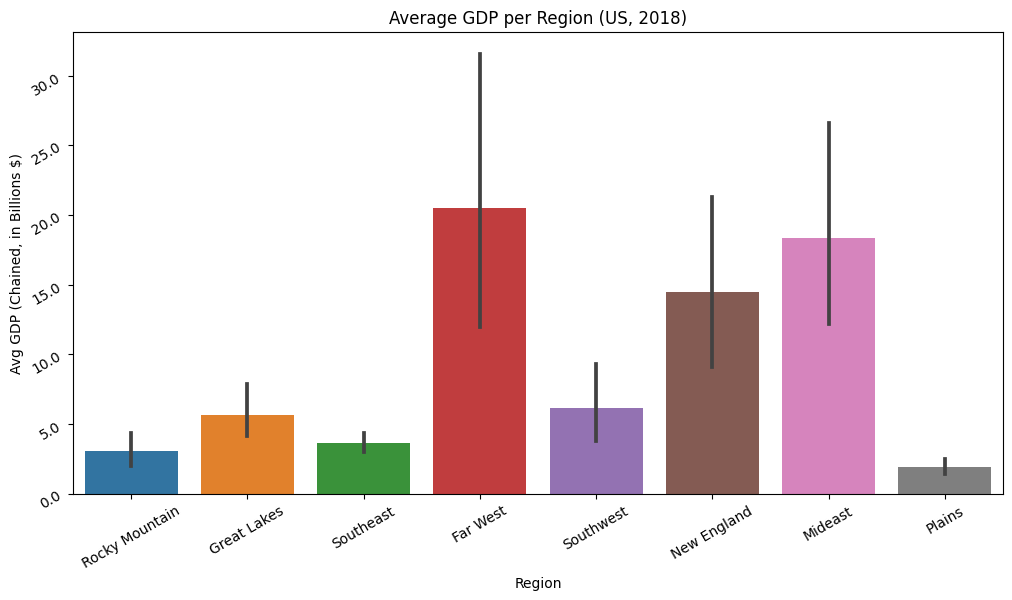

In [88]:

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_2018, x='Region', y='GDP (Chained $)')

ax.set_ylabel("Avg GDP (Chained, in Billions $)")
ax.set_title("Average GDP per Region (US, 2018)")
ax.tick_params(rotation=30)

ax.yaxis.set_major_formatter(formatter);

## Chained GDP Top 5 Counties Barplot

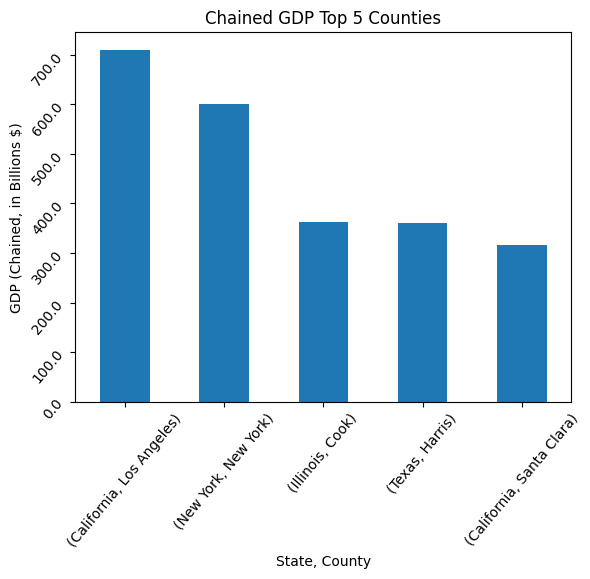

In [145]:
top_county = df_2018.groupby(['State','County'])['GDP (Chained $)'].sum().sort_values(ascending=False)
ax = top_county.head().plot(kind='bar')

ax.set_ylabel("GDP (Chained, in Billions $)")
ax.set_xlabel("State, County")
ax.set_title("Chained GDP Top 5 Counties")

ax.tick_params(rotation=50)
ax.yaxis.set_major_formatter(formatter);